# dataset look over

In [4]:
from ultralytics.yolo.utils.downloads import download
from pathlib import Path

# Download labels
file_path = './dataset/coco/'
segments = False  # segment or box labels
dir = Path(file_path)  # dataset root dir
url = 'https://github.com/ultralytics/yolov5/releases/download/v1.0/'
urls = [url + ('coco2017labels-segments.zip' if segments else 'coco2017labels.zip')]  # labels
download(urls, dir=dir.parent)
# Download data
urls = ['http://images.cocodataset.org/zips/test2017.zip']  # 7G, 41k images (optional)
download(urls, dir=dir / 'images', threads=3)

100%|██████████| 46.4M/46.4M [00:11<00:00, 4.37MB/s]
Unzipping dataset/coco2017labels.zip to dataset...
⚠️ Download failure, retrying 1/3 http://images.cocodataset.org/zips/test2017.zip...
curl: (23) Failed writing body (0 != 1540)
⚠️ Download failure, retrying 2/3 http://images.cocodataset.org/zips/test2017.zip...
curl: (23) Failed writing body (0 != 1432)
⚠️ Download failure, retrying 3/3 http://images.cocodataset.org/zips/test2017.zip...
curl: (23) Failed writing body (0 != 1432)
⚠️ Download failure, retrying 1/3 http://images.cocodataset.org/zips/train2017.zip...
curl: (23) Failed writing body (0 != 503)
⚠️ Download failure, retrying 2/3 http://images.cocodataset.org/zips/train2017.zip...
curl: (23) Failed writing body (0 != 1448)
⚠️ Download failure, retrying 3/3 http://images.cocodataset.org/zips/train2017.zip...
curl: (23) Failed writing body (0 != 1448)
Unzipping dataset/coco/images/test2017.zip to dataset/coco/images...


In [1]:
!pwd

/home/keti/cloud-edge-aicontainers/v2/bhc/domain_adaptation


In [5]:
import os

dir = 'dataset/'
train_path = 'coco128/images/train2017'
train_add_path = 'coco128_bright/'
train_sub_path = 'coco128_dark/'
test_path = 'test2017/'
test_add_path = 'test_bright/'
test_sub_path = 'test_dark/'

print('훈련용 데이터 >>')
print('원본 : ', len(os.listdir(dir + train_path)))
print('밝은 이미지 : ', len(os.listdir(dir + train_add_path)))
print('어두운 이미지 : ', len(os.listdir(dir + train_sub_path)))
print()
print('테스트용 데이터 >>')
print('원본 : ', len(os.listdir(dir + test_path)))
print('밝은 이미지 : ', len(os.listdir(dir + test_add_path)))
print('어두운 이미지 : ', len(os.listdir(dir + test_sub_path)))

훈련용 데이터 >>
원본 :  128
밝은 이미지 :  128
어두운 이미지 :  128

테스트용 데이터 >>
원본 :  40670
밝은 이미지 :  40670
어두운 이미지 :  40670


# 조도에 따른 훈련성능 변화 실험 1차
동일 데이터셋 전이학습<br>
<br>
train : coco128<br>
validation : coco128

In [15]:
from ultralytics import YOLO

model5 = YOLO("yolov8n.pt")

## val = coco128 origin dataset
model5.train(data='train_org.yaml', epochs=3)
metrics5 = model5.val()

New https://pypi.org/project/ultralytics/8.0.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=train_org.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

In [14]:
metrics5.box.map

0.4912203057447503

In [8]:
from ultralytics import YOLO

model1 = YOLO("yolov8n.pt")

## val = coco128_bright
model1.train(data='train_org.yaml', epochs=3)
metrics = model1.val()

New https://pypi.org/project/ultralytics/8.0.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=train_org.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

In [11]:
metrics.box.map

0.40966776571852176

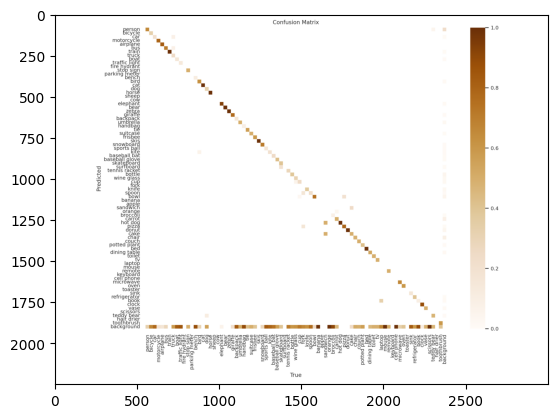

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import cv2
import numpy as np

cfm_image = cv2.imread('runs/detect/val/confusion_matrix.png', cv2.IMREAD_UNCHANGED)

plt.imshow(cfm_image)

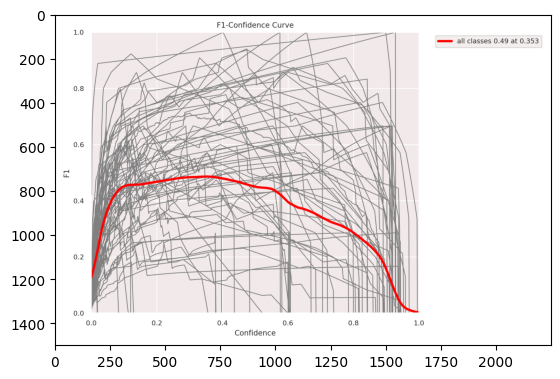

In [2]:
f1_image = cv2.imread('runs/detect/val/F1_curve.png', cv2.IMREAD_UNCHANGED)
plt.imshow(f1_image)

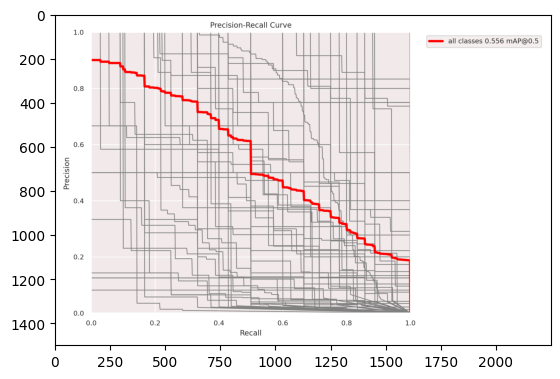

In [3]:
prc_image = cv2.imread('runs/detect/val/PR_curve.png', cv2.IMREAD_UNCHANGED)
plt.imshow(prc_image)

In [5]:
from ultralytics import YOLO

model2 = YOLO("yolov8n.pt")

## val = coco128_dark
model2.train(data='train_org.yaml', epochs=3)
metrics2 = model2.val()

New https://pypi.org/project/ultralytics/8.0.81 available 😃 Update with 'pip install -U ultralytics'
/home/keti/anaconda3/envs/yolov8/lib/python3.8/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=train_org.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resum

In [8]:
metrics2.box.map

0.3257468997801532

In [11]:
model3 = YOLO("yolov8n.pt")

## val = coco128_dark
model3.train(data='train_bright.yaml', epochs=3)
metrics3 = model3.val()

metrics3.box.map

New https://pypi.org/project/ultralytics/8.0.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=train_bright.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

0.42941781405105944

In [12]:
model4 = YOLO("yolov8n.pt")

## val = coco128_dark
model4.train(data='train_dark.yaml', epochs=3)
metrics4 = model4.val()

metrics4.box.map

New https://pypi.org/project/ultralytics/8.0.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=train_dark.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torch

0.3485081958818929

# 조도 변화에 따른 훈련성능 변화 실험 2차
데이터 갯수 및 훈련 / 평가 데이터셋 분리<br>
<br>
train : coco12500_train (coco dataset train2017 원본에서 10,000개 random sampling 하여 재구축)<br>
validation : coco12500_val (coco dataset val2017 원본에서 2,500개 random sampling 하여 재구축)

## 데이터셋 구축 과정
기존 데이터셋 랜덤 샘플링<br>
레이블 정보 복사<br>
yolo format에 맞는 트리 구조 구축<br>
데이터 추출 복제

### 원본이미지 데이터셋 재구축

In [16]:
!pwd

/home/keti/cloud-edge-aicontainers/v2/bhc/domain_adaptation


In [17]:
import os

dir = 'datasets/coco/labels/'
dir2 = 'datasets/coco/images/'
train_path = 'train2017/'
val_path = 'val2017/'
test_path = 'test2017/'

print('labels : ')
print(len(os.listdir(dir+train_path)))
print(len(os.listdir(dir+val_path)))

print()
print('images : ')
print(len(os.listdir(dir2+train_path)))
print(len(os.listdir(dir2+val_path)))
print(len(os.listdir(dir2+test_path)))

labels : 
117266
4952

images : 
118287
5000
40670


레이블 갯수가 더 적습니다. 결측치 데이터가 있는 듯 하여 레이블을 먼저 추출하고 이미지를 파싱하는 방식으로 변경하였습니다.

In [18]:
import random
import shutil
from tqdm import tqdm

train_data = random.sample(os.listdir(dir+train_path), 10000)
val_data = random.sample(os.listdir(dir+val_path), 2500)

print(train_data[0:10])

['000000091912.txt', '000000201372.txt', '000000452102.txt', '000000255479.txt', '000000396321.txt', '000000573284.txt', '000000574922.txt', '000000159196.txt', '000000207219.txt', '000000518574.txt']


In [19]:
## copy labels

torg_path = 'datasets/coco/labels/train2017/'
tcp_path1 = 'datasets/coco12500/labels/org/train/'
tcp_path2 = 'datasets/coco12500/labels/bright/train/'
tcp_path3 = 'datasets/coco12500/labels/dark/train/'

for d in tqdm(train_data, desc='훈련용 레이블 복사 : ', mininterval=0.01):
    shutil.copyfile(torg_path + d, tcp_path1 + d)
    shutil.copyfile(torg_path + d, tcp_path2 + d)
    shutil.copyfile(torg_path + d, tcp_path3 + d)

vorg_path = 'datasets/coco/labels/val2017/'
vcp_path1 = 'datasets/coco12500/labels/org/val/'
vcp_path2 = 'datasets/coco12500/labels/bright/val/'
vcp_path3 = 'datasets/coco12500/labels/dark/val/'

for d in tqdm(val_data, desc='평가용 레이블 복사 : ', mininterval=0.01):
    shutil.copyfile(vorg_path + d, vcp_path1 + d)
    shutil.copyfile(vorg_path + d, vcp_path2 + d)
    shutil.copyfile(vorg_path + d, vcp_path3 + d)

평가용 레이블 복사 : 100%|██████████| 2500/2500 [00:07<00:00, 354.03it/s] 


In [20]:
## extract images

train_imgs = []

for d in tqdm(train_data, desc='훈련용 이미지 리스트 생성 : ', mininterval=0.01):
    d = d.replace('.txt', '.jpg')
    train_imgs.append(d)

val_imgs = []

for d in tqdm(val_data, desc='평가용 이미지 리스트 생성 : ', mininterval=0.01):
    d = d.replace('.txt', '.jpg')
    val_imgs.append(d)

print(val_imgs[0:10])

평가용 이미지 리스트 생성 : 100%|██████████| 2500/2500 [00:00<00:00, 752638.53it/s]

['000000050638.jpg', '000000304817.jpg', '000000117525.jpg', '000000021879.jpg', '000000311950.jpg', '000000280710.jpg', '000000477227.jpg', '000000328117.jpg', '000000179214.jpg', '000000025424.jpg']


In [21]:
## copy org imgs
# train files
torg_path = 'datasets/coco/images/train2017/'
tcp_path = 'datasets/coco12500/images/org/train/'

for d in tqdm(train_imgs, desc='원본 훈련용 이미지 복사 : ', mininterval=0.01):
    shutil.copyfile(torg_path + d, tcp_path + d)

# validation files
vorg_path = 'datasets/coco/images/val2017/'
vcp_path = 'datasets/coco12500/images/org/val/'

for d in tqdm(val_imgs, desc='원본 평가용 이미지 복사 : ', mininterval=0.01):
    shutil.copyfile(vorg_path + d, vcp_path + d)

원본 평가용 이미지 복사 : 100%|██████████| 2500/2500 [00:19<00:00, 128.04it/s]


In [22]:
## write yolo format metadata file

## file list
# trainfiles
fto = open('datasets/coco12500/train_org.txt', 'w')
fvo = open('datasets/coco12500/val_org.txt', 'w')
ftb = open('datasets/coco12500/train_bright.txt', 'w')
# val files
fvb = open('datasets/coco12500/val_bright.txt', 'w')
ftd = open('datasets/coco12500/train_dark.txt', 'w')
fvd = open('datasets/coco12500/val_dark.txt', 'w')

## write train files
for d in tqdm(train_data, desc='훈련용 메타데이터 파일 생성 : ', mininterval=0.01):
    fto.write('./images/org/train/' + d + '\n')
    ftb.write('./images/bright/train/' + d + '\n')
    ftd.write('./images/dark/train/' + d + '\n')

fto.close()
ftb.close()
ftd.close()


## write val files
for d in tqdm(val_data, desc='평가용 메타데이터 파일 생성 : ', mininterval=0.01):
    fvo.write('./images/org/val/' + d + '\n')
    fvb.write('./images/bright/val/' + d + '\n')
    fvd.write('./images/dark/val/' + d + '\n')

fvo.close()
fvb.close()
fvd.close()

평가용 메타데이터 파일 생성 : 100%|██████████| 2500/2500 [00:00<00:00, 741672.09it/s]


### 조도변화 데이터셋 생성

#### 조도변화 테스트

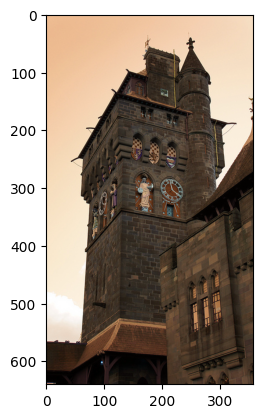

In [27]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import cv2

torg_path = 'datasets/coco12500/images/org/train/'
test_img = '000000069873.jpg'

src = cv2.imread(torg_path+test_img, cv2.IMREAD_COLOR)

val = 100
array = np.full(src.shape, (val, val, val), dtype=np.uint8)

add = cv2.add(src, array)
sub = cv2.subtract(src, array)

plt.imshow(src)

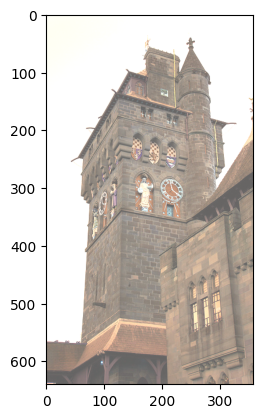

In [28]:
plt.imshow(add)

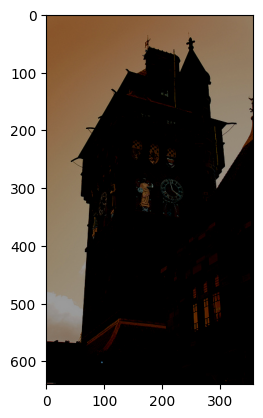

In [29]:
plt.imshow(sub)

In [30]:
vorg_path = 'datasets/coco12500/images/org/val/'

tfile_list = os.listdir(torg_path)
vfile_list = os.listdir(vorg_path)

In [33]:
print(len(tfile_list))
print(len(vfile_list))

10000
2500


In [35]:
tadd_path = 'datasets/coco12500/images/bright/train/'
vadd_path = 'datasets/coco12500/images/bright/val/'

tsub_path = 'datasets/coco12500/images/dark/train/'
vsub_path = 'datasets/coco12500/images/dark/val/'

for d in tqdm(tfile_list, desc='훈련용 데이터 생성', mininterval=0.01):
    src = cv2.imread(torg_path + d, cv2.IMREAD_COLOR)

    val = 100
    array = np.full(src.shape, (val, val, val), dtype=np.uint8)

    add = cv2.add(src, array)
    sub = cv2.subtract(src, array)

    cv2.imwrite(tadd_path + d, add)
    cv2.imwrite(tsub_path + d, sub)

for d in tqdm(vfile_list, desc='평가용 데이터 생성', mininterval=0.01):
    src = cv2.imread(vorg_path + d, cv2.IMREAD_COLOR)

    val = 100
    array = np.full(src.shape, (val, val, val), dtype=np.uint8)

    add = cv2.add(src, array)
    sub = cv2.subtract(src, array)

    cv2.imwrite(vadd_path + d, add)
    cv2.imwrite(vsub_path + d, sub)

평가용 데이터 생성: 100%|██████████| 2500/2500 [00:46<00:00, 53.28it/s]


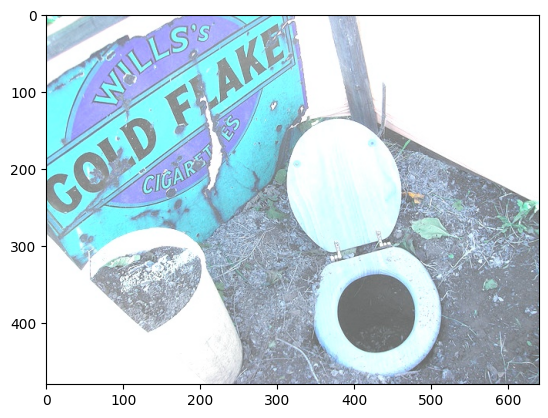

In [40]:
tmp = os.listdir(tadd_path)[0]
img = cv2.imread(tadd_path + tmp, cv2.IMREAD_COLOR)
plt.imshow(img)

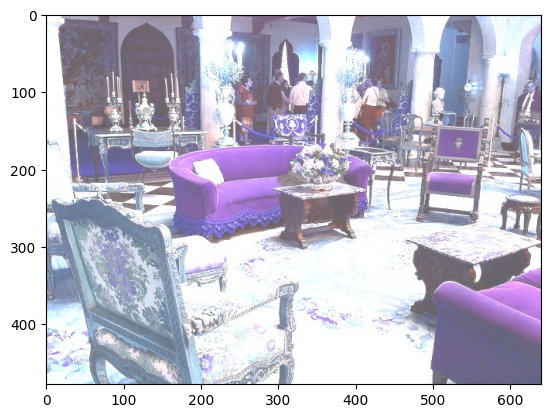

In [41]:
plt.imshow(cv2.imread(vadd_path + os.listdir(vadd_path)[0], cv2.IMREAD_COLOR))

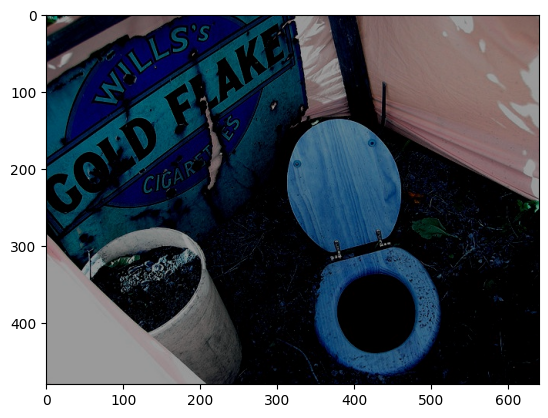

In [42]:
plt.imshow(cv2.imread(tsub_path + os.listdir(tsub_path)[0], cv2.IMREAD_COLOR))

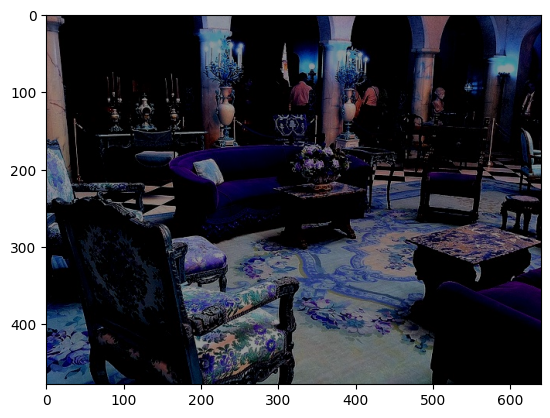

In [43]:
plt.imshow(cv2.imread(vsub_path + os.listdir(vsub_path)[0], cv2.IMREAD_COLOR))

## 모델 성능 평가 2차
재구축한 coco12500 데이터셋을 통한 훈련 및 성능 평가<br>
train - validation dataset 완전 분리
<br><br>

origin dataset : coco12500/images/org/
* coco12500/images/org/train
* coco12500/images/org/val
<br>

added dataset : coco12500/images/bright/
* coco12500/images/bright/train
* coco12500/images/bright/val
<br>

subtracted dataset : coco12500/images/dark/
* coco12500/images/dark/train
* coco12500/images/dark/val

In [1]:
from ultralytics import YOLO

org_model = YOLO("yolov8n.pt")

## train coco12500 org dataset
org_model.train(data='train_org.yaml', epochs=10)

## validate coco12500 org dataset
org_org_metrics = org_model.val()

New https://pypi.org/project/ultralytics/8.0.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12044MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=train_org.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, re

In [2]:
org_org_metrics.box.map

0.3012179853948993

In [3]:
org_brt_metrics = org_model.val(data='train_bright.yaml')

Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12044MiB)
val: Scanning /home/keti/cloud-edge-aicontainers/v2/bhc/domain_adaptation/datasets/coco12500/labels/bright/val.cache... 2500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2500/2500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/157 [00:04<04:07,  1.61s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:41<00:00,  3.75it/s]
                   all       2500      18579      0.497      0.354      0.358      0.245
                person       2500       5614      0.632       0.62      0.654      0.417
               bicycle       2500        154      0.419      0.332      0.338      0.189
                   car       2500        932      0.598      0.399      0.436      0.275
            motorc

In [4]:
org_brt_metrics.box.map

0.24493500270027052

In [5]:
org_drk_metrics = org_model.val(data='train_dark.yaml')

Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12044MiB)
val: Scanning /home/keti/cloud-edge-aicontainers/v2/bhc/domain_adaptation/datasets/coco12500/labels/dark/val.cache... 2500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2500/2500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:38<00:00,  4.03it/s]
                   all       2500      18579      0.489      0.289      0.296      0.195
                person       2500       5614      0.533      0.519      0.524      0.311
               bicycle       2500        154      0.395      0.188      0.228      0.121
                   car       2500        932      0.578       0.29       0.33      0.197
            motorcycle       2500        205      0.533      0.366      0.373      0.204
              airplane       2500         84      0.713      0.679      0.706      0.523
                   bu

In [6]:
org_drk_metrics.box.map

0.19525500053436842

In [1]:
from ultralytics import YOLO

brt_model = YOLO('runs/detect/train20/weights/best.pt')
brt_brt_metrics = brt_model.val(data='train_bright.yaml')

Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12044MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /home/keti/cloud-edge-aicontainers/v2/bhc/domain_adaptation/datasets/coco12500/labels/bright/val.cache... 2500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2500/2500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/157 [00:08<06:17,  2.45s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:45<00:00,  3.46it/s]
                   all       2500      18579      0.481      0.354      0.356      0.235
                person       2500       5614      0.657      0.604      0.656      0.417
               bicycle       2500        154      0.492      0.266      0.294      0.161
                   car      

In [2]:
brt_brt_metrics.box.map

0.23547998267608614

In [3]:
drk_model = YOLO('runs/detect/train21/weights/best.pt')
drk_drk_metrics = drk_model.val(data='train_dark.yaml')

Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12044MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /home/keti/cloud-edge-aicontainers/v2/bhc/domain_adaptation/datasets/coco12500/labels/dark/val.cache... 2500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2500/2500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/157 [00:04<04:08,  1.62s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:37<00:00,  4.15it/s]
                   all       2500      18579      0.544      0.331      0.352      0.232
                person       2500       5614      0.686      0.497      0.563      0.343
               bicycle       2500        154      0.731      0.194      0.256      0.135
                   car       2

In [4]:
drk_drk_metrics.box.map

0.23185978423797052

# 조도 변화에 따른 훈련성능 변화 실험 3차
원본 데이터 추출본 추가 학습 시 베이스 모델보다 떨어지는 성능<br>
(base-model mAP 0.37 // coco12500 trained model mAP 0.30)<br>
과적합이 의심됨.

## 훈련방식 변경
원본 데이터에 대한 평가는 추가학습 없이 베이스 모델로 수행<br>
이후 조도 변형 데이터에 대한 추가 학습만 진행한 후 성능 변화 관측

In [2]:
from ultralytics import YOLO

### 원본 데이터 학습 모델 성능 관측
base-pretrained-model (coco dataset)<br>
no transfer-learning

In [2]:
base_model = YOLO("yolov8n.pt")
base_metrics = base_model.val(data='train_org.yaml')

Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12044MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /home/keti/cloud-edge-aicontainers/v2/bhc/domain_adaptation/datasets/coco12500/labels/org/val.cache... 2500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2500/2500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:51<00:00,  3.07it/s]
                   all       2500      18579      0.629      0.475      0.521      0.373
                person       2500       5614      0.763      0.667      0.747      0.516
               bicycle       2500        154       0.72      0.383      0.456      0.274
                   car       2500        932      0.654       0.51      0.554       0.36
            motorcycle       2500        205      0.718      0.522      0.626      0.399
              airplane       2

In [3]:
base_metrics.box.map

0.37337169570283246

In [4]:
base_brt_metrics = base_model.val(data='train_bright.yaml')

Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12044MiB)
val: Scanning /home/keti/cloud-edge-aicontainers/v2/bhc/domain_adaptation/datasets/coco12500/labels/bright/val.cache... 2500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2500/2500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:41<00:00,  3.82it/s]
                   all       2500      18579      0.599      0.423      0.463      0.326
                person       2500       5614      0.743      0.633      0.714      0.479
               bicycle       2500        154       0.63      0.354      0.407      0.234
                   car       2500        932      0.641      0.462      0.505      0.321
            motorcycle       2500        205      0.722      0.463      0.581      0.359
              airplane       2500         84      0.705      0.738      0.772      0.602
                   

In [5]:
base_brt_metrics.box.map

0.3255586982383283

In [6]:
base_drk_metrics = base_model.val(data='train_dark.yaml')

Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12044MiB)
val: Scanning /home/keti/cloud-edge-aicontainers/v2/bhc/domain_adaptation/datasets/coco12500/labels/dark/val.cache... 2500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2500/2500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 1/157 [00:02<06:05,  2.34s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:37<00:00,  4.21it/s]
                   all       2500      18579      0.561       0.36      0.391      0.264
                person       2500       5614      0.671       0.53      0.585       0.37
               bicycle       2500        154      0.608      0.211      0.291      0.161
                   car       2500        932      0.585      0.354      0.379      0.229
            motorcyc

In [7]:
base_drk_metrics.box.map

0.264452641729035

### 조도 변화 데이터 맞춤 학습을 통한 성능 변화 관측
pretrained-model + transfer-learning<br>

#### coco12500 dataset
* coco12500/images/bright/ : val +100
* coco12500/images/dark/ :  val -100

In [8]:
## train added dataset
base_model.train(data='train_bright.yaml', epochs=3)
brt_brt_metrics = base_model.val()

New https://pypi.org/project/ultralytics/8.0.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12044MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=train_bright.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, 

In [9]:
brt_brt_metrics.box.map

0.21874163381002998

In [10]:
## train subtracted dataset
base_model.train(data='train_dark.yaml', epochs=3)
drk_drk_metrics = base_model.val()

New https://pypi.org/project/ultralytics/8.0.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12044MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=train_dark.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, re

In [11]:
drk_drk_metrics.box.map

0.18619607796419094

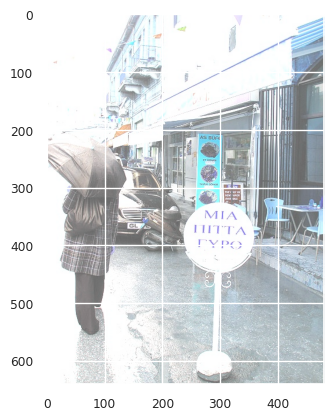

In [20]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

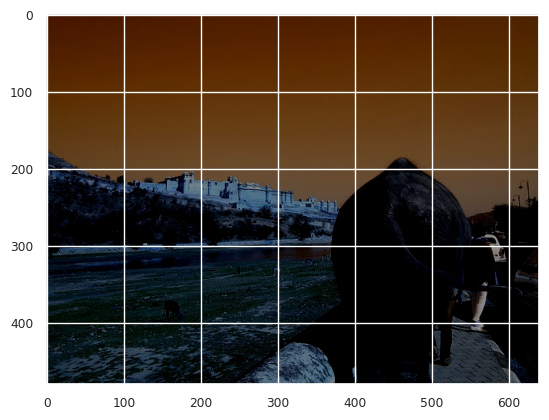

In [22]:
img_path = 'datasets/coco12500/images/dark/train/'
imglist = os.listdir(img_path)
test_img = imglist[11]

src = cv2.imread(img_path + test_img, cv2.IMREAD_COLOR)

plt.imshow(src)
plt.show()

In [4]:
## train added dataset
base_model = YOLO("runs/detect/train6/weights/last.pt")
base_model.train(data='train_bright.yaml', epochs=6, resume=True)
brt_brt_metrics = base_model.val(data='train_bright.yaml')

brt_brt_metrics.box.map

New https://pypi.org/project/ultralytics/8.0.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.74 🚀 Python-3.8.15 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12044MiB)
yolo/engine/trainer: task=detect, mode=train, model=runs/detect/train6/weights/last.pt, data=train_bright.yaml, epochs=6, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_n

0.2628458528472566

In [ ]:
## train subtracted dataset
base_model = YOLO("yolov8n.pt")
base_model.train(data='train_dark.yaml', epochs=6, verbose=True)
drk_drk_metrics = base_model.val(data='train_dark.yaml')

In [ ]:
drk_drk_metrics.box.map